In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

In [200]:
df = pd.read_excel("loan.xlsx")

In [201]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [203]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

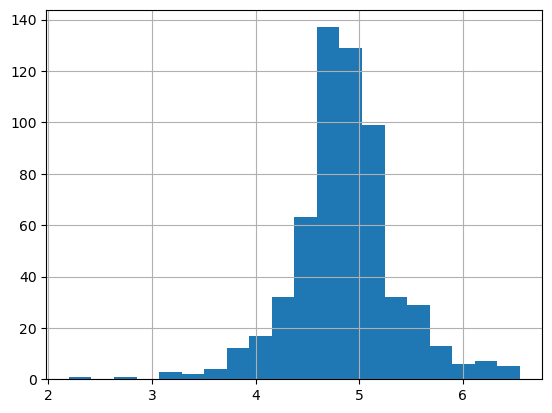

In [204]:
df['LoanAmount_log']= np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [205]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<Axes: >

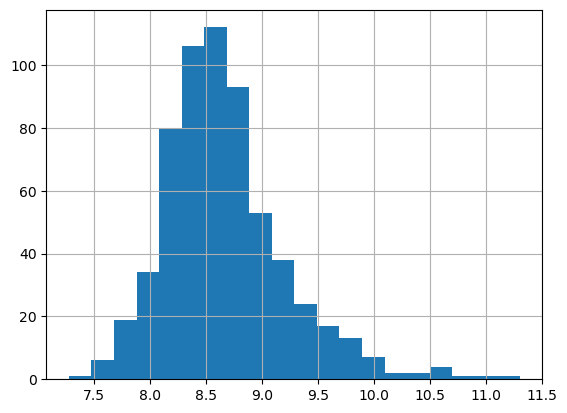

In [206]:
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']
df['TotalIncome_log']= np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [207]:
df["Gender"].fillna(df['Gender'].mode()[0], inplace = True)
df["Married"].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace =True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount_log = df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

In [208]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [209]:
df.shape

(614, 16)

In [210]:
x =  df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values
x

array([['Male', 'No', 0, ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', 1, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

### y

In [212]:
print(f"Percent of missing gender is {(df["Gender"].isnull().sum()/df.shape[0])*100}")


Percent of missing gender is 0.0


number of people who take loan as group by gender
Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

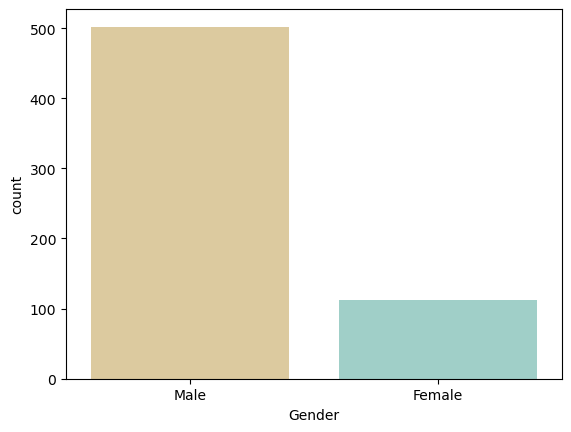

In [213]:
print('number of people who take loan as group by gender')
print(df['Gender'].value_counts())
sns.countplot(x = 'Gender',data = df,palette ='BrBG')

number of people who take loan as group by Marital status :
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

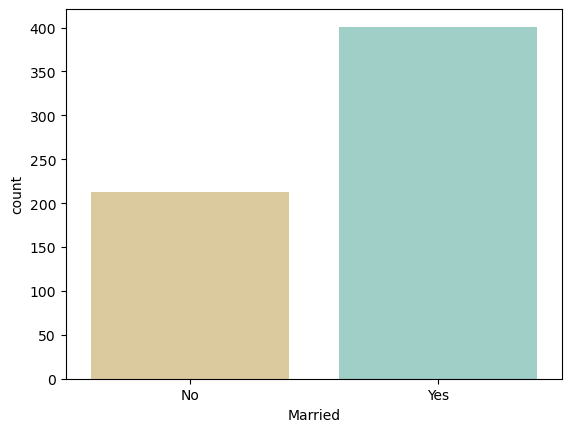

In [214]:
print('number of people who take loan as group by Marital status :')
print(df['Married'].value_counts())
sns.countplot(x = 'Married',data = df,palette ='BrBG')

number of people who take loan as group by Dependents :
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

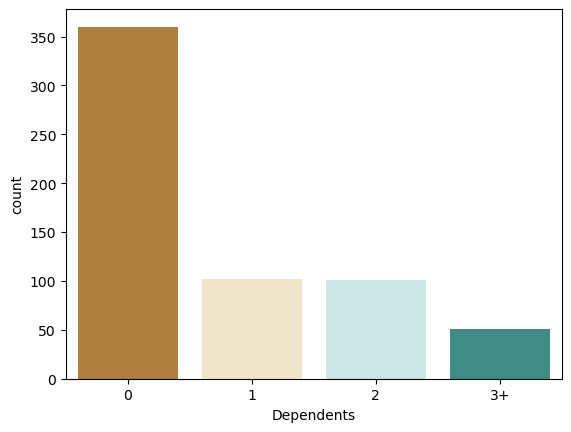

In [215]:
print('number of people who take loan as group by Dependents :')
print(df['Dependents'].value_counts())
sns.countplot(x = 'Dependents',data = df,palette ='BrBG')

number of people who take loan as group by Self employed :
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

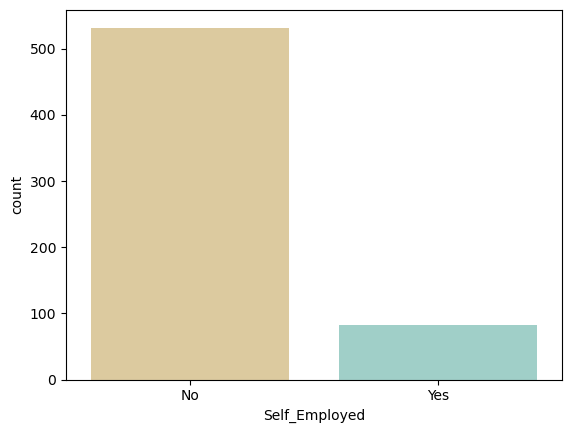

In [216]:
print('number of people who take loan as group by Self employed :')
print(df['Self_Employed'].value_counts())
sns.countplot(x = 'Self_Employed',data = df,palette ='BrBG')

number of people who take loan as group by Loan Amount :
LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

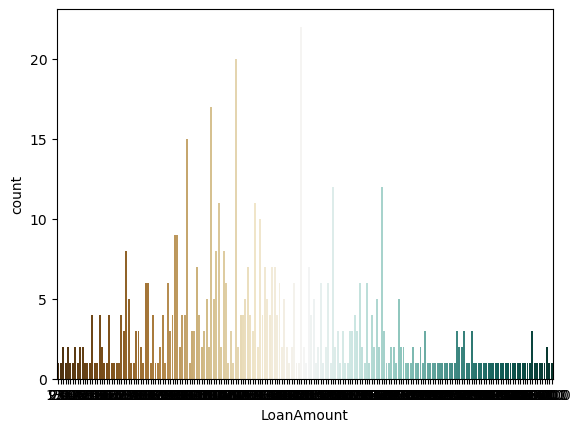

In [217]:
print('number of people who take loan as group by Loan Amount :')
print(df['LoanAmount'].value_counts())
sns.countplot(x = 'LoanAmount',data = df,palette ='BrBG')

number of people who take loan as group by Credit history :
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

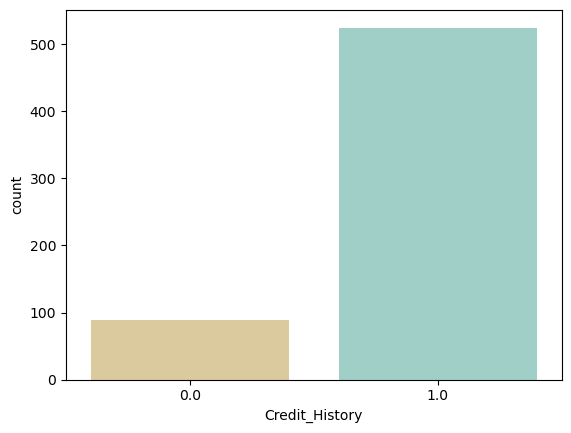

In [218]:
print('number of people who take loan as group by Credit history :')
print(df['Credit_History'].value_counts())
sns.countplot(x = 'Credit_History',data = df,palette ='BrBG')

In [219]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder() 

column = [0,1,3,4,7]


for i in column:
    x[:,i] = Labelencoder_x.fit_transform(x[:,i])



In [220]:
x[:, 2] = np.where(x[:, 2] == '3+', 3, x[:, 2])
x[:, 2] = x[:, 2].astype(int)  # now it's all numbers
x[1:30]

array([[1, 1, 1, 0, 8, 1.0, 4.852030263919617, 333],
       [1, 1, 0, 0, 8, 1.0, 4.189654742026425, 42],
       [1, 1, 0, 1, 8, 1.0, 4.787491742782046, 238],
       [1, 0, 0, 0, 8, 1.0, 4.948759890378168, 327],
       [1, 1, 2, 0, 8, 1.0, 5.58724865840025, 464],
       [1, 1, 0, 1, 8, 1.0, 4.553876891600541, 118],
       [1, 1, 3, 0, 8, 0.0, 5.062595033026967, 292],
       [1, 1, 2, 0, 8, 1.0, 5.123963979403259, 291],
       [1, 1, 1, 0, 8, 1.0, 5.855071922202427, 542],
       [1, 1, 2, 0, 8, 1.0, 4.248495242049359, 123],
       [1, 1, 2, 0, 8, 1.0, 4.6913478822291435, 162],
       [1, 1, 2, 0, 8, 1.0, 5.298317366548036, 493],
       [1, 0, 0, 0, 8, 1.0, 4.736198448394496, 201],
       [1, 1, 2, 0, 4, 1.0, 2.833213344056216, 14],
       [1, 0, 0, 0, 8, 1.0, 4.8283137373023015, 241],
       [1, 0, 1, 1, 6, 1.0, 4.605170185988092, 89],
       [0, 0, 0, 0, 8, 0.0, 4.330733340286331, 79],
       [1, 1, 0, 1, 8, 1.0, 4.890349128221754, 228],
       [1, 1, 0, 0, 8, 1.0, 4.74493212836325, 337

In [221]:
y = Labelencoder_x.fit_transform(y)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [222]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 0)

In [223]:
from sklearn.preprocessing import StandardScaler
ss =  StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [224]:
from sklearn.ensemble import RandomForestClassifier

rf_clf   = RandomForestClassifier()
rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [225]:
from sklearn import metrics
y_pred_rf = rf_clf.predict(X_test)

print("acc of random forest clf is  ",metrics.accuracy_score(y_pred_rf,y_test))

y_pred

acc of random forest clf is   0.7560975609756098


array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [226]:
#Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [227]:
y_pred_nb = nb_clf.predict(X_test)
print (' acc of naive bayes is %', metrics.accuracy_score(y_pred_nb,y_test))
y_pred

 acc of naive bayes is % 0.8292682926829268


array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [228]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [229]:
y_pred_dt = dt_clf.predict(X_test)
print (' acc of Decision Tree Classifier is %', metrics.accuracy_score(y_pred_dt,y_test))

 acc of Decision Tree Classifier is % 0.6829268292682927


In [275]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [279]:
y_pred_kn = kn_clf.predict(X_test)
print (' acc of Decision Tree Classifier is %', metrics.accuracy_score(y_pred_kn,y_test))

 acc of Decision Tree Classifier is % 0.7967479674796748
